<a href="https://colab.research.google.com/github/anangdwicahyadi4568/UAS_ANALITIKADATA/blob/main/UAS_Forecasting_Anang_Dwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Langkah pertama yaitu mengimport library yang dibutuhkan

In [ ]:
#Langkah awal yaitu mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

- Kemudian mengimport dataset yang dipilih

In [ ]:
#Link gdirve dataset (https://drive.google.com/file/d/1tn4oNGW_V5GOhxxtYy24ivFSnQxYscNb/view?usp=drive_link)

!gdown 1tn4oNGW_V5GOhxxtYy24ivFSnQxYscNb

Downloading...
From: https://drive.google.com/uc?id=1tn4oNGW_V5GOhxxtYy24ivFSnQxYscNb
To: /content/JPMorgan Chase.csv
100% 415k/415k [00:00<00:00, 103MB/s]


- Sekilas penjelasan dari data ini yaitu harga saham dua bank investasi terbesar di Amerika Serikat, yaitu Goldman Sachs & JPMorgan Chase, periode 2000 sampai 2023. Goldman Sachs adalah sebuah bank investasi dan perusahaan jasa keuangan multinasional Amerika Serikat. Didirikan pada tahun 1869, Goldman Sachs berkantor pusat di 200 West Street, Lower Manhattan, dengan kantor pusat regional di London, Warsawa, Bangalore, Hong Kong, Tokyo, Dallas, dan Salt Lake City, serta kantor-kantor tambahan di pusat-pusat keuangan internasional lainnya. Goldman Sachs adalah bank investasi terbesar kedua di dunia berdasarkan pendapatan dan berada di peringkat ke-57 dalam daftar Fortune 500 perusahaan Amerika Serikat terbesar berdasarkan total pendapatan. Bank ini dianggap sebagai lembaga keuangan yang penting secara sistemik oleh Dewan Stabilitas Keuangan.

In [ ]:
train_data = pd.read_csv('JPMorgan Chase.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,49.833332,50.250000,48.083332,48.583332,24.406227,12019200
1,2000-01-04,47.083332,47.458332,46.125000,47.250000,23.870712,11723400
2,2000-01-05,46.833332,48.375000,46.000000,46.958332,23.723372,8714550
3,2000-01-06,46.750000,48.625000,46.500000,47.625000,24.060173,8369250
4,2000-01-07,48.416668,49.000000,47.333332,48.500000,24.502220,6571950


- Setelah terbaca datasetnya, kemudian pastikan dataset bersih dari missing value. Agar lebih mudah, menggunakan ".info"

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5863 non-null   object 
 1   Open       5863 non-null   float64
 2   High       5863 non-null   float64
 3   Low        5863 non-null   float64
 4   Close      5863 non-null   float64
 5   Adj Close  5863 non-null   float64
 6   Volume     5863 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 320.8+ KB


- Bisa dipastikan dari hasil diatas, bahwa data tersebut tidak ada missing value, karena bisa ditampilkan bahwa semua panjang datanya sama
- Setelah itu mengechek statistik featurnya. Yaitu melihat nilai mean, median, dan maksimumnya

In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5.863000e+03
mean,64.414728,65.132362,63.682219,64.413200,51.506623,2.032749e+07
std,36.405645,36.676471,36.138749,36.404863,38.360588,1.887252e+07
min,15.370000,16.350000,14.960000,15.450000,8.618587,1.347300e+06
25%,38.660000,39.250000,38.164999,38.715000,24.377334,9.768100e+06
50%,47.880001,48.450001,47.320000,47.820000,31.579823,1.381860e+07
75%,89.834999,90.790001,88.295002,89.465000,76.367790,2.361360e+07
max,172.710007,172.960007,170.539993,171.779999,164.015747,2.172942e+08


- Kemudian membaca date kedalam datetime. Agar nanti data tersebut menjadi kedalam satu format tipoe data datetime

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,49.833332,50.250000,48.083332,48.583332,24.406227,12019200
2000-01-04,47.083332,47.458332,46.125000,47.250000,23.870712,11723400
2000-01-05,46.833332,48.375000,46.000000,46.958332,23.723372,8714550
2000-01-06,46.750000,48.625000,46.500000,47.625000,24.060173,8369250
2000-01-07,48.416668,49.000000,47.333332,48.500000,24.502220,6571950


- Kemudian mengechek data closingan nya ketika harga ditutup dengan range 24 tahun dan menampilkannya kedalam bentuk grafik. Dari grafik dibawah ini bisa dilihat bahwa memiliki trend harga naik turun dan kecendrungan terus naik sampai pada tahun 2024 sedikit mengalami penurunan

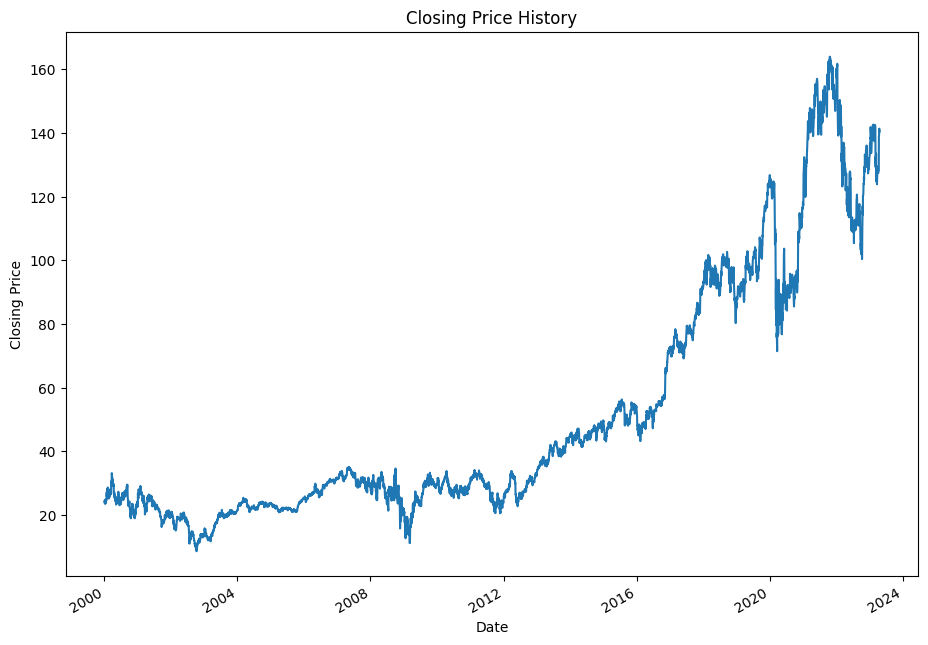

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

- Kemudian diuji coba juga dengan fitur yang lain. Dan ternyata dari berbagai grafik dibawah memvisualisasikan trend harga yang naik turun namun kecendrungannya naik. Namun pada volume, sedikit berbeda karena di volume ini adalah seberapa banyak orang-orang bertransaksi, jadi memiliki kemungkinan orang yang bertransaksi adalah orang yang sama

<Figure size 1600x800 with 0 Axes>

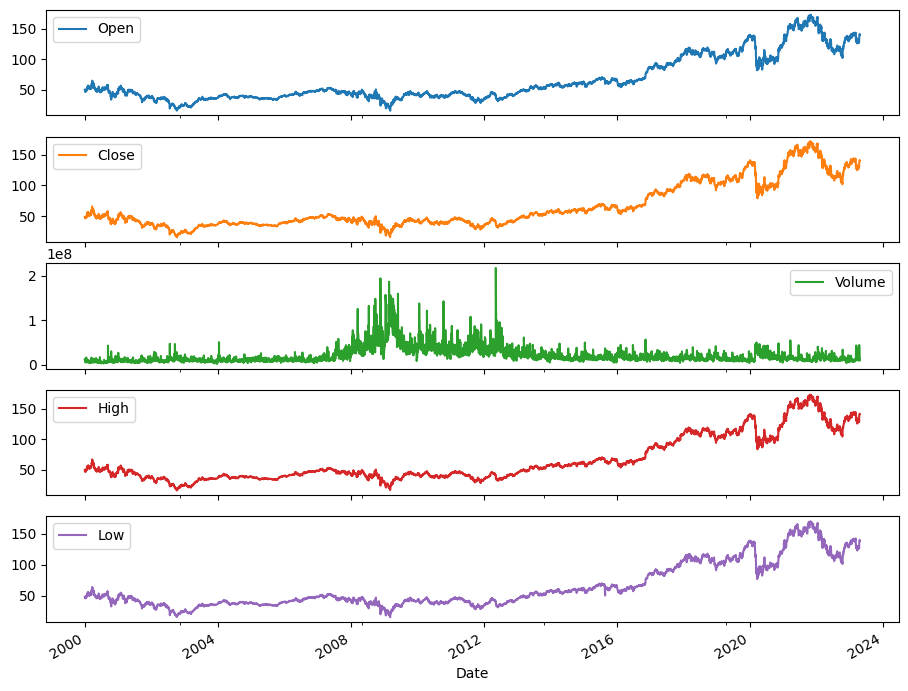

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

- Kemudian dibuat fitur yang akan digunakan yaitu membaca data harga tertinggi dan harga terendah, harga penutupan dan harga pembukaan

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

- Kemudian dimasukkan kedalam dataset nya

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

- Kemduian membuiat harga penutupan saham sebagai label yang digunakan untuk memprediksi. Harga penutupan ini yang menentukan harga saham dihari tersebut

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

294


<ipython-input-70-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


- Kemudian memakai beberapa library yang dibutuhkan

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

- Kemudian menggunakan standardscaler untuk menormalisasi data, karena ukuran interval data yang cukup jauh dikisaran ribuan, dinormalisasikan agar mempercepat proses training di machine learning

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-72-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


- Kemudian menentukan data X dan Y

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

- Data Y

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-74-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


- Kemudian proses spliting dataset untuk train dan test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Digunakan 2 model, yaitu LinearRegression dan RandomForest

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [ ]:
lr_confidence

0.8209830395481672

- Model RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [ ]:
rf_confidence

0.9393996015327838

- Kemudian proses training

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-80-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-80-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-80-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

- Hasil dari training
- Hasil prediksi ditampilkan pada warna orange untuk forecasting dikemudian hari

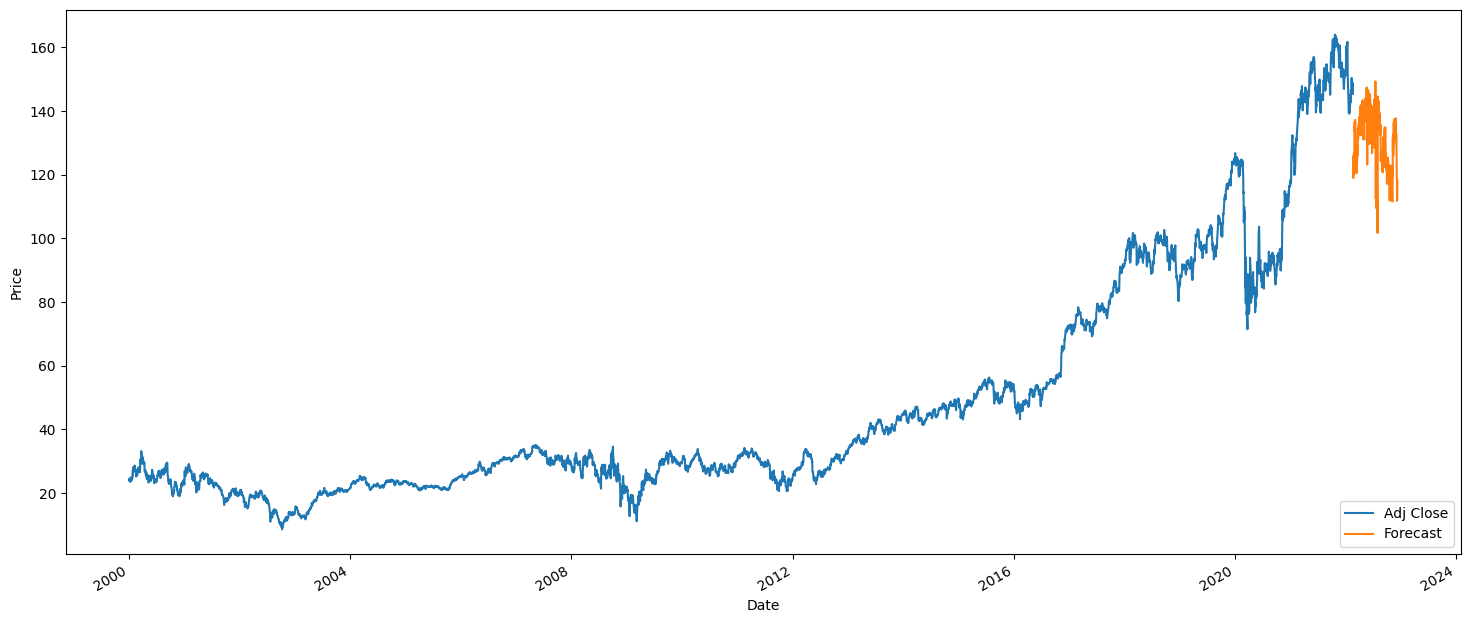

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()